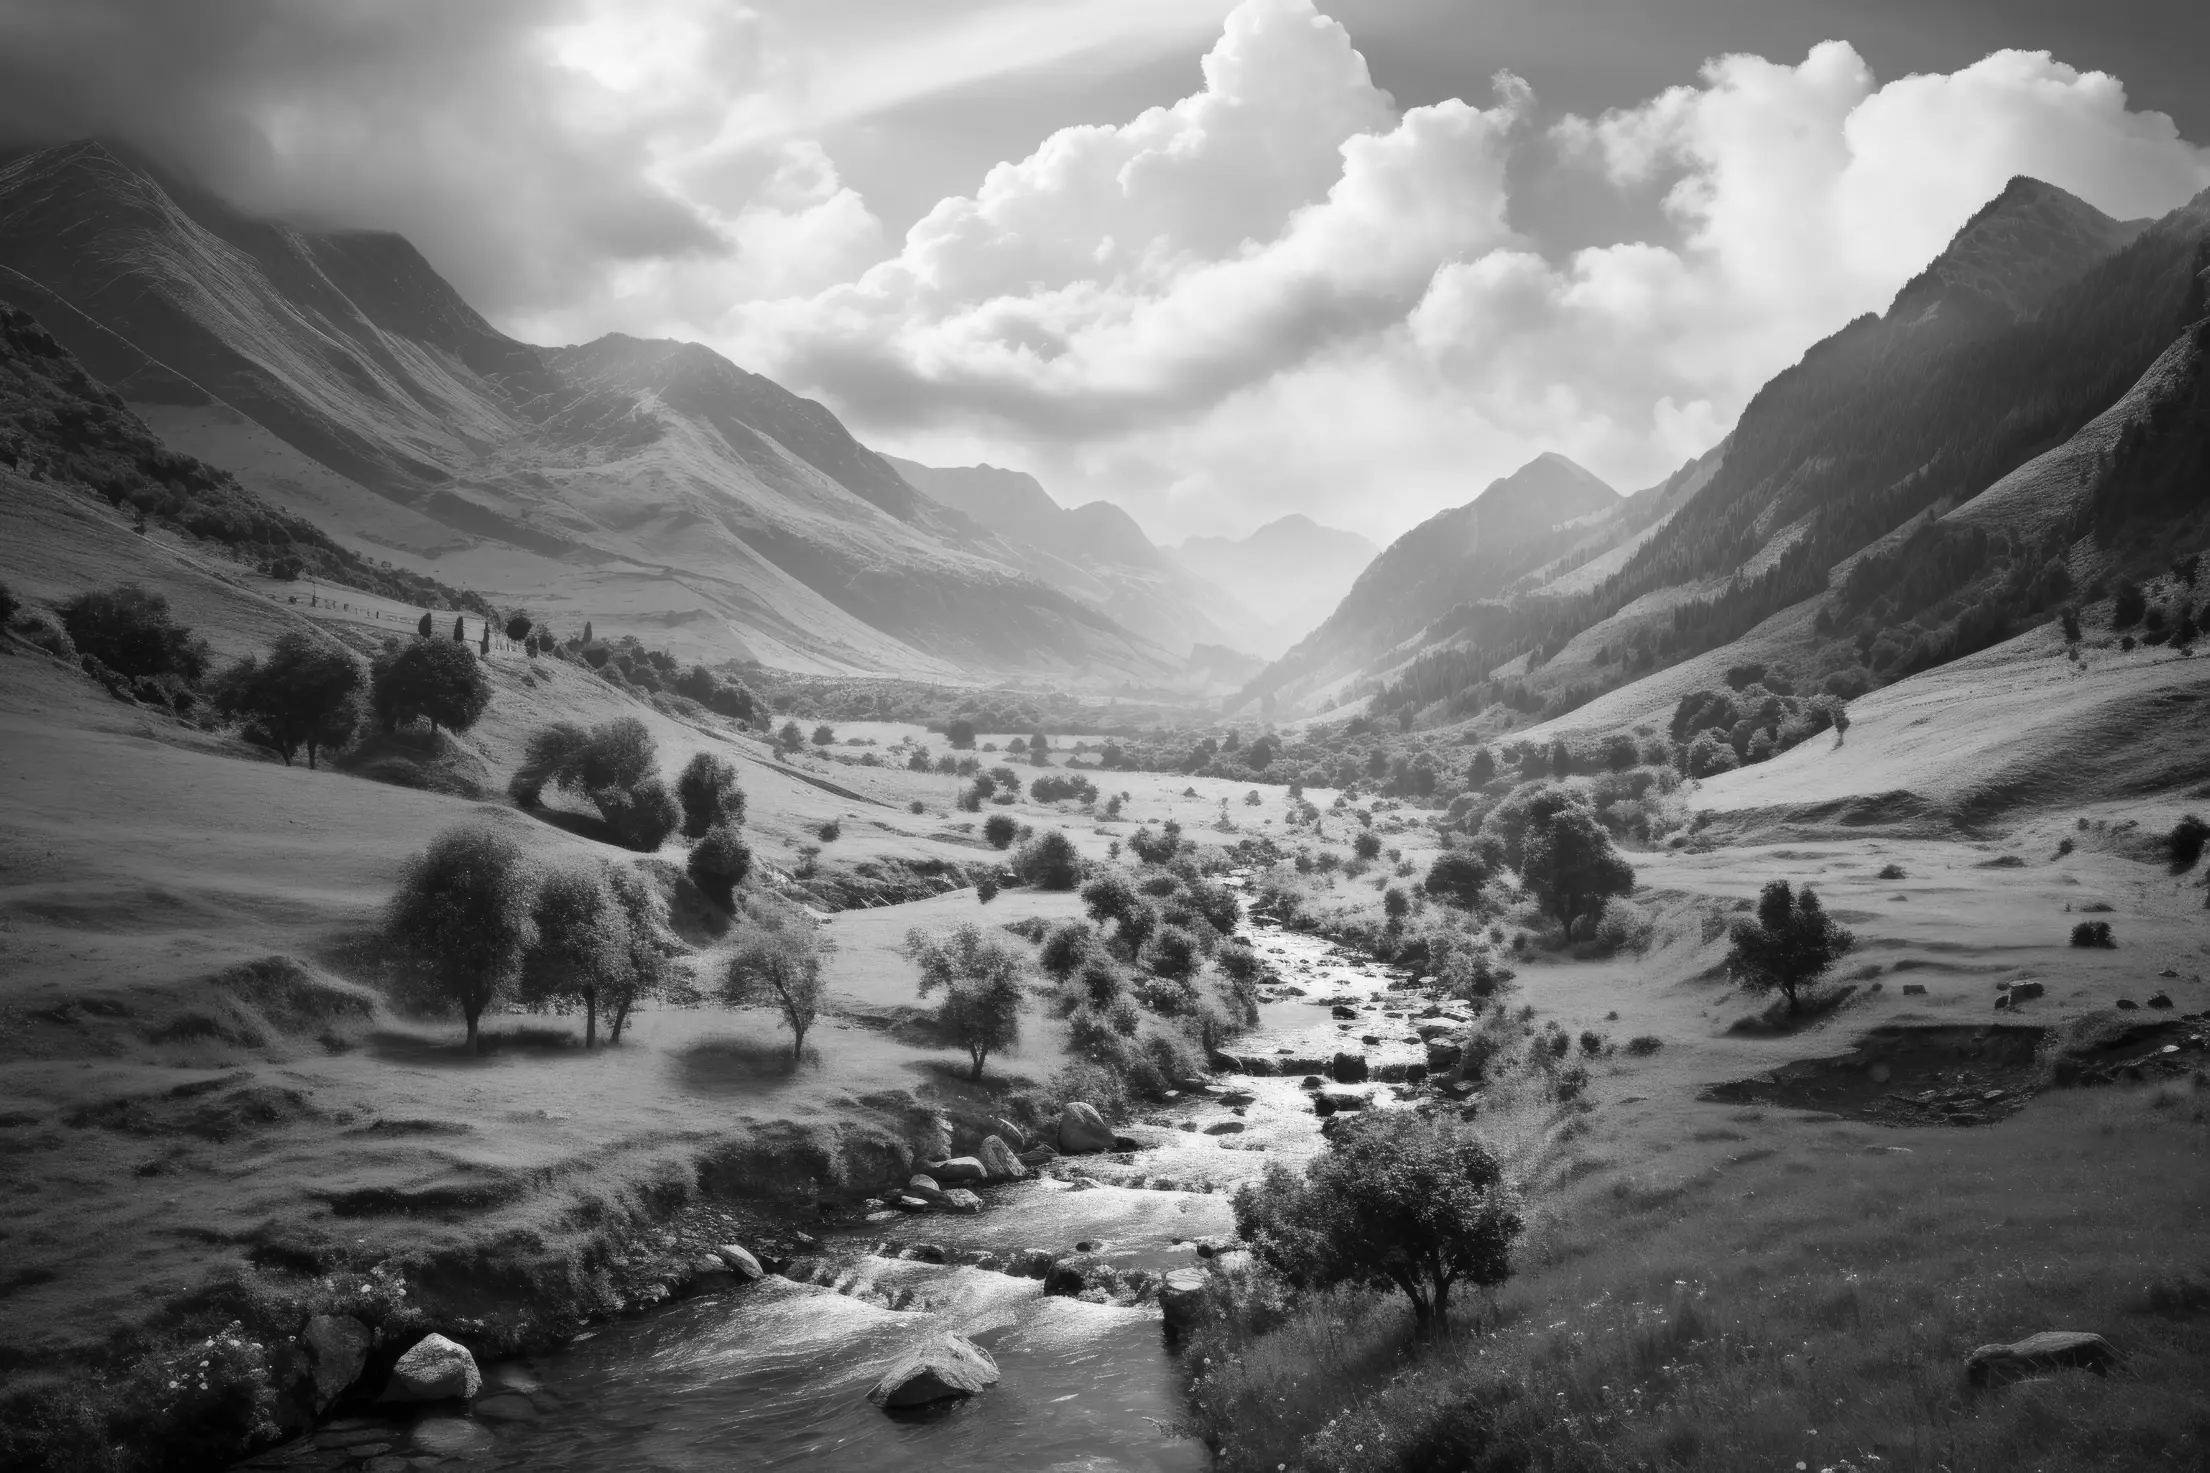

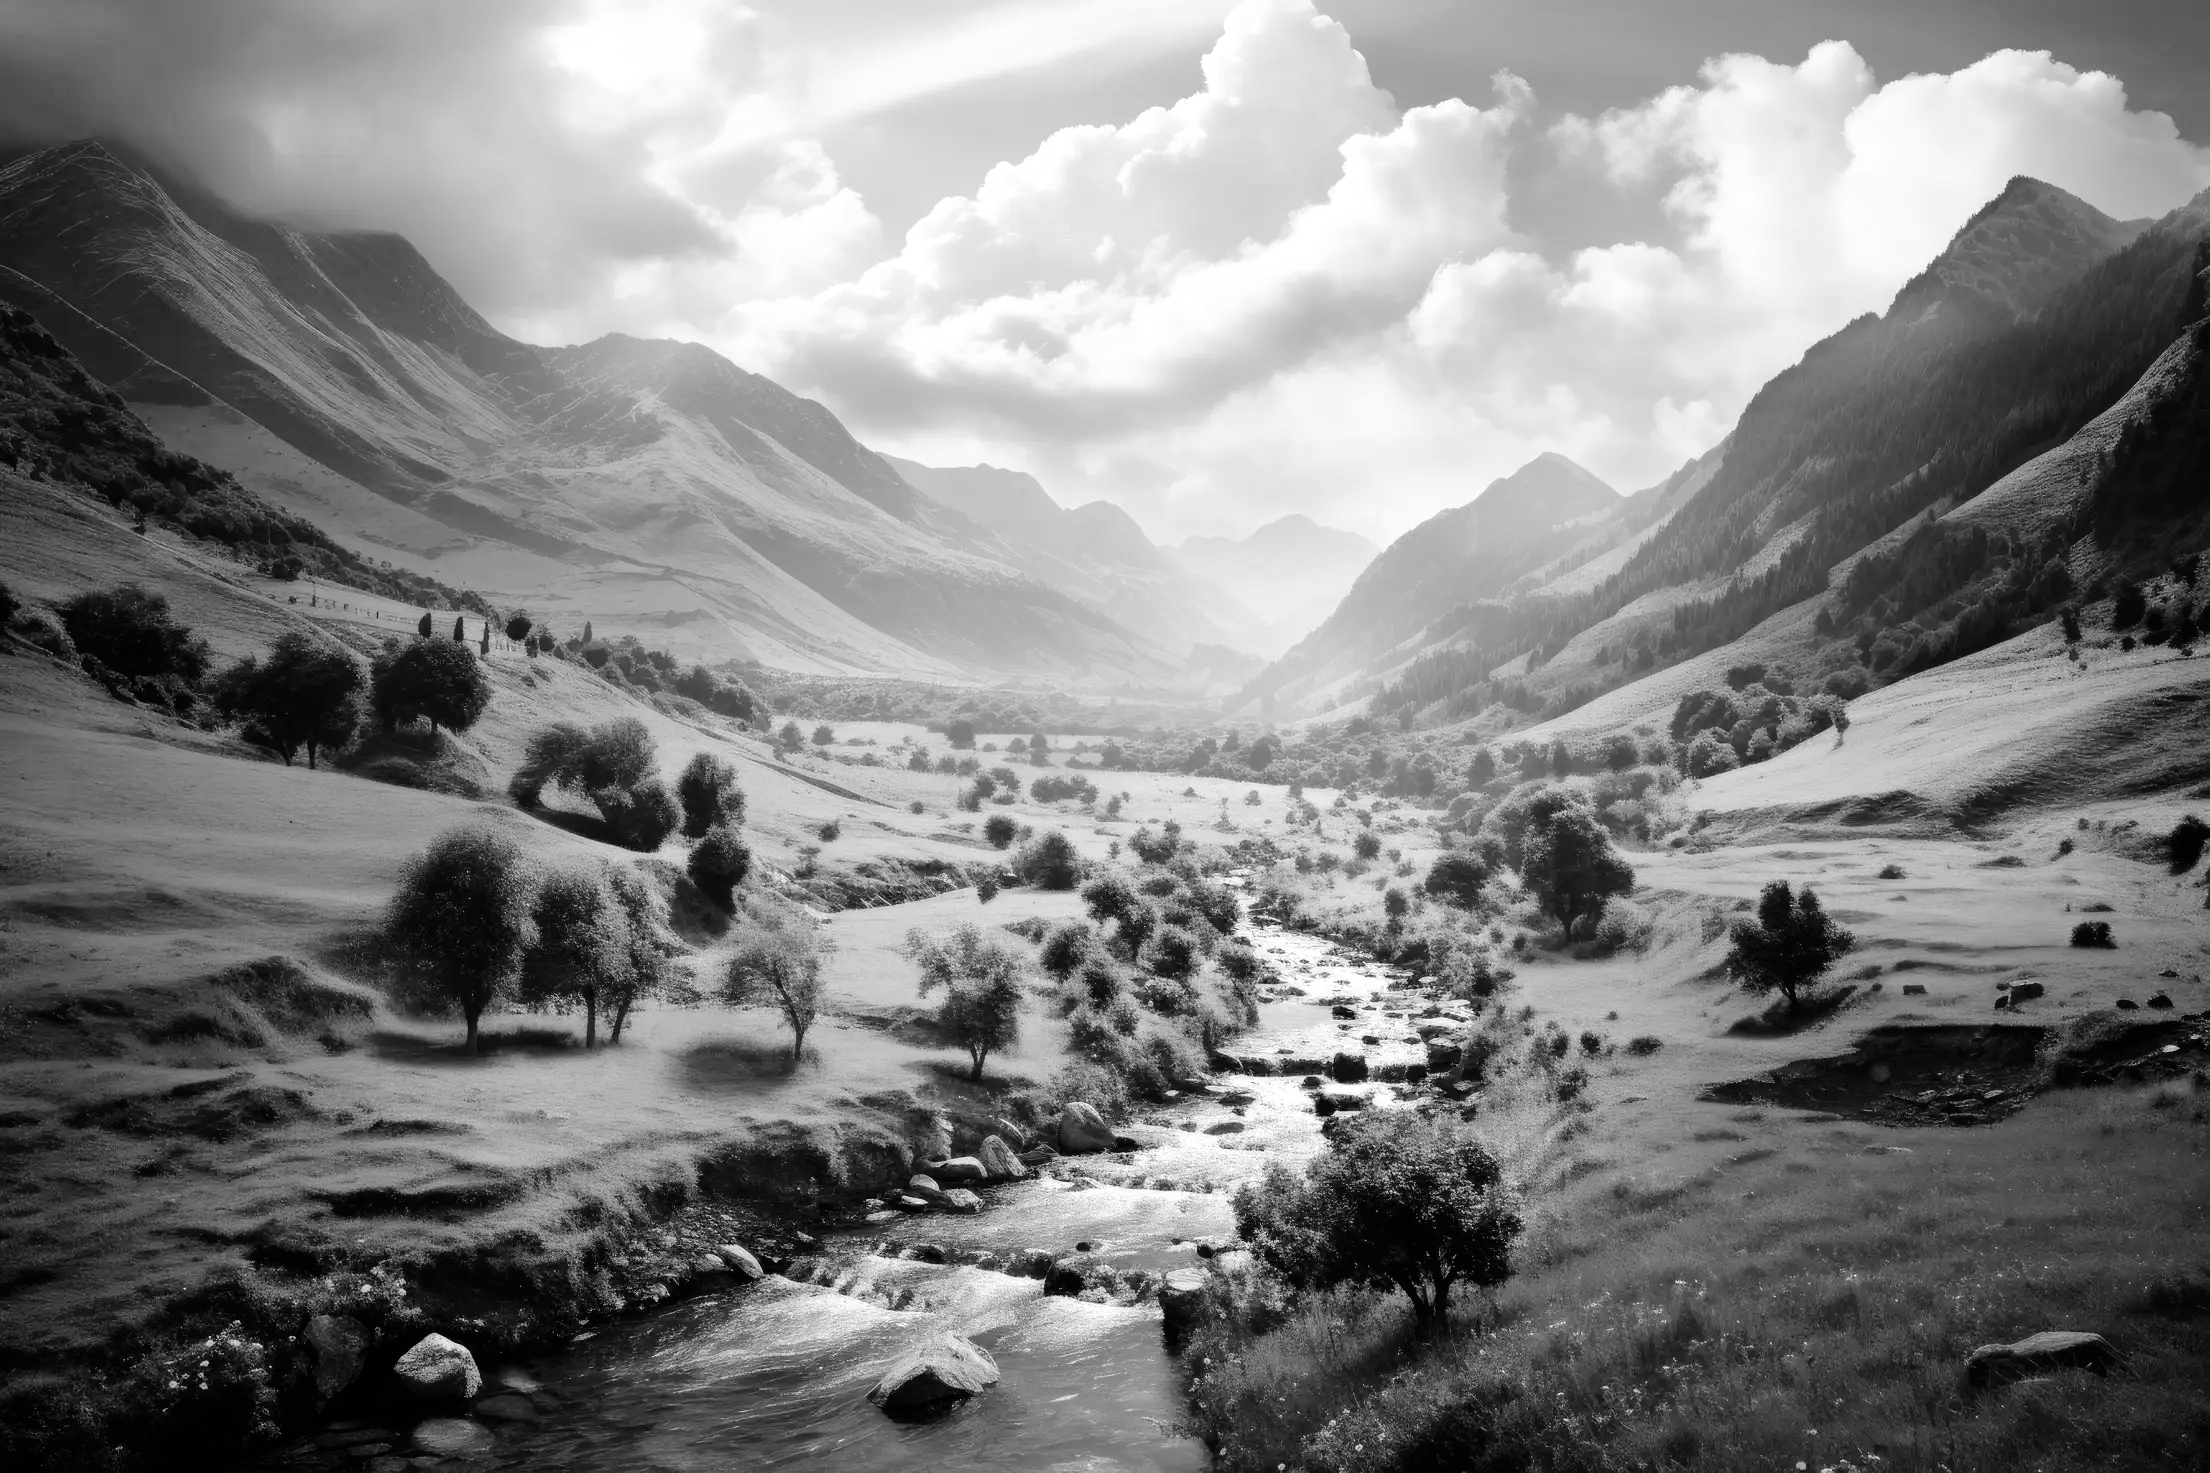

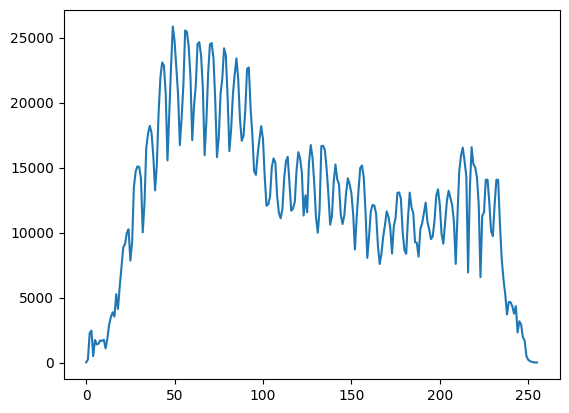

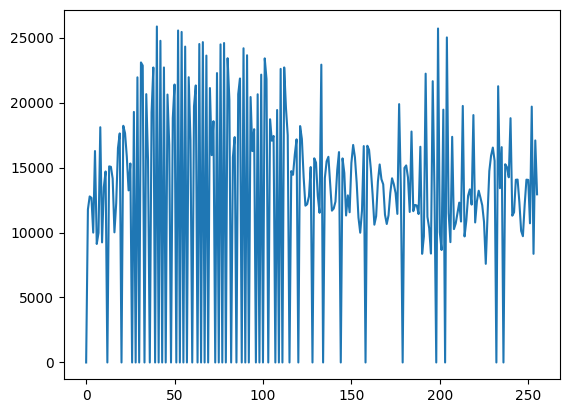

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab.patches import cv2_imshow
# Read the image
img = cv2.imread('/content/beautiful-nature-scenery-free-photo (1).jpg', 0)
h, w = img.shape

# Display the original image
cv2_imshow(img)

# Histogram Equalization

def getcount(img):
    count = [0]*256
    h, w = img.shape
    for i in range(h):
        for j in range(w):
            k = img[i][j]
            count[k] = count[k] + 1

    r = [*range(0, 256, 1)]
    return r, count

n, nk = getcount(img)

s = sum(nk)

pdf = []
for i in nk:
    pdf.append(i / s)

c = 0
cdf = []
for i in pdf:
    c = c + i
    cdf.append(c)

cdf255 = []
for i in cdf:
    cdf255.append(i * 255)

op = []
for i in cdf255:
    op.append(math.ceil(i))

hist_equalized = np.zeros(img.shape, np.uint8)

for i in range(h):
    for j in range(w):
        k = img[i][j]
        hist_equalized[i][j] = op[k]

# Display the histogram equalized image
cv2_imshow(hist_equalized)

# Display histogram of original image
r, count = getcount(img)
plt.plot(r, count)
plt.show()

# Display histogram of histogram equalized image
r, count = getcount(hist_equalized)
plt.plot(r, count)
plt.show()
